# Percentual coverage of the alignment
<br>
Made by: Cynthia Soto <br>
Fecha: Sep 22, 2020 <br>
Lastest md: Feb 05, 2021   #New samples added. <br>
Lastest md: May 30, 2022   #Changes in the visualizations. <br>

Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
Dataset: Infected and healthy samples of Arabidopsis (Col-0)<br>
Dataset composed by 20 RNASeq samples (fungi)<br>
Datatype representation: tvs format file 
<br><br>
**Process**<br>
Stats (rows) were gotten from the STAR alignment's report with a local script called: **~/my_statistics_STAR_alignment.txt** located in the **grep_utilities_folder.**



In [1]:
# Libraries required
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis


In [3]:
# choose one of the stats file prepared.
df=pd.read_csv("results-data/my_statistics_STAR_alignment_all.txt", sep='\s+', header=None)
#df=pd.read_csv("results-data/my_statistics_STAR_alignment_healthy.txt", sep='\s+', header=None)
#df=pd.read_csv("results-data/my_statistics_STAR_alignment_infected.txt", sep='\s+', header=None)

df.columns = ["sample","stat", "value"] 
df['value'] = df['value'].str.rstrip('%').astype('float') #/ 100.0
print(len(df))
df.head(20)

150


,sample,stat,value
0,SRR3383696,unique_mapped_reads,98.20
1,SRR3383697,unique_mapped_reads,98.14
2,SRR3383779,unique_mapped_reads,93.55
3,SRR3383780,unique_mapped_reads,95.20
4,SRR10586397,unique_mapped_reads,89.07
5,SRR10586399,unique_mapped_reads,88.69
6,SRR364389,unique_mapped_reads,87.17
7,SRR364390,unique_mapped_reads,87.29
8,SRR364398,unique_mapped_reads,80.25
9,SRR364399,unique_mapped_reads,80.25


### Load meta-data labels 

In [4]:
#lst_header=["sample","fungus","hpi","ID"] 
lst_header=["sample","ID"] 

file='meta-data/ID_samples.csv'   ###Ojo. arreglar ID_samples.csv metadata.csv, metadata2.cvs (index)
df_meta=pd.read_csv(file, sep='\,', engine='python',usecols=[0,4]) #usecols=[0,4] For all*
#df_meta=pd.read_csv(file, sep='\,', engine='python',usecols=[0,1]) # For healthy and Infected results

print(df_meta.index)
print(df_meta)

## filter for ID sample name
is_sample =  df_meta['sample']=='SRR364399'
sample = df_meta[is_sample]
ID_sample = sample['ID'].values[0]
ID_sample

RangeIndex(start=0, stop=25, step=1)
         sample         ID
0     SRR364389       Ch22
1     SRR364400       Ch40
2     SRR364401       Ch40
3     SRR364390       Ch22
4     SRR364391       Ch22
5     SRR364392       Ch22
6     SRR364398       Ch40
7     SRR364399       Ch40
8    SRR3383696       Bc12
9    SRR3383697       Bc12
10   SRR3383779       Bc18
11   SRR3383780       Bc18
12  SRR10586397       Bc24
13  SRR10586399       Bc24
14   SRR6283146       Ss30
15   SRR6283147       Ss30
16   SRR6283148       Ss30
17   SRR3383640  healthy12
18   SRR3383641  healthy12
19   SRR3383782  healthy18
20   SRR3383783  healthy18
21   SRR3383821  healthy24
22   SRR3383822  healthy24
23   SRR6283144  healthy30
24   SRR6283145  healthy30


'Ch40'

In [5]:
result = pd.merge(df, df_meta, on='sample')
result

,sample,stat,value,ID
0,SRR3383696,unique_mapped_reads,98.20,Bc12
1,SRR3383696,average_mapped_length,92.61,Bc12
2,SRR3383696,number_splices,4122662.00,Bc12
3,SRR3383696,mismatch_rate_per_base,0.12,Bc12
4,SRR3383696,deletion_average_length,1.37,Bc12
...,...,...,...,...
145,SRR6283145,average_mapped_length,118.09,healthy30
146,SRR6283145,number_splices,7965398.00,healthy30
147,SRR6283145,mismatch_rate_per_base,0.13,healthy30
148,SRR6283145,deletion_average_length,1.35,healthy30


In [6]:
df['stat']=="unique_mapped_reads"

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: stat, Length: 150, dtype: bool

In [7]:
# rect1 histogram
is_unique_mapped =  df[df['stat']=="unique_mapped_reads"]

#print(is_unique_mapped)
f_mapped = is_unique_mapped['value']
#type(f_mapped)
f_mapped_no_index = f_mapped.to_string(index=False)
print(f_mapped_no_index)

#rec2 histogram
is_deletion =  df[df['stat']=="reads_unmapped_too_short"]
f_deletion = is_deletion['value']
#print(f_deletion)
f_deletion_no_index = f_deletion.to_string(index=False)
print(f_deletion_no_index)

print(len(f_mapped))
print(len(f_deletion))

98.20
98.14
93.55
95.20
89.07
88.69
87.17
87.29
80.25
80.25
82.08
82.25
77.45
77.40
32.35
29.50
36.48
98.31
98.34
98.13
98.34
98.09
97.87
97.51
97.99
 0.24
 0.38
 4.98
 3.32
 9.74
10.14
11.17
11.06
16.39
16.41
16.37
16.21
21.03
21.10
66.31
69.21
62.29
 0.07
 0.09
 0.07
 0.07
 0.09
 0.08
 0.73
 0.15
25
25


In [8]:
# porcentajes de alineamientos unicos
f_mapped.sort_values()
# porcentajes de reads_unmapped_too_short
f_deletion.sort_values()

145     0.07
144     0.07
142     0.07
147     0.08
146     0.09
143     0.09
149     0.15
85      0.24
86      0.38
148     0.73
88      3.32
87      4.98
89      9.74
90     10.14
92     11.06
91     11.17
96     16.21
95     16.37
93     16.39
94     16.41
97     21.03
98     21.10
101    62.29
99     66.31
100    69.21
Name: value, dtype: float64

In [9]:
## Example how to get ID sample to label the plot  ***** jump to next lines
# leyends
sample_names =  df['sample'].unique()
sample_names 

print(sample_names)
sample_IDs =[]
is_sample =  df_meta['sample']=='SRR10586397'
sIDs = df_meta[is_sample].values[0,1]
sample_IDs.append(sIDs)
sample_IDs

['SRR3383696' 'SRR3383697' 'SRR3383779' 'SRR3383780' 'SRR10586397'
 'SRR10586399' 'SRR364389' 'SRR364390' 'SRR364398' 'SRR364399' 'SRR364391'
 'SRR364392' 'SRR364400' 'SRR364401' 'SRR6283147' 'SRR6283148'
 'SRR6283146' 'SRR3383640' 'SRR3383641' 'SRR3383782' 'SRR3383783'
 'SRR3383821' 'SRR3383822' 'SRR6283144' 'SRR6283145']


['Bc24']

In [10]:
## Get ID sample to label the plot 
# leyends
sample_names =  df['sample'].unique()
sample_names 

print(sample_names)
sample_IDs =[]
for name in sample_names:
    #print(name)
    is_sample =  df_meta['sample']==name
    #print(is_sample)
    sIDs = df_meta[is_sample].values[0,1]
    sample_IDs.append(sIDs)

print(sample_IDs) 

['SRR3383696' 'SRR3383697' 'SRR3383779' 'SRR3383780' 'SRR10586397'
 'SRR10586399' 'SRR364389' 'SRR364390' 'SRR364398' 'SRR364399' 'SRR364391'
 'SRR364392' 'SRR364400' 'SRR364401' 'SRR6283147' 'SRR6283148'
 'SRR6283146' 'SRR3383640' 'SRR3383641' 'SRR3383782' 'SRR3383783'
 'SRR3383821' 'SRR3383822' 'SRR6283144' 'SRR6283145']
['Bc12', 'Bc12', 'Bc18', 'Bc18', 'Bc24', 'Bc24', 'Ch22', 'Ch22', 'Ch40', 'Ch40', 'Ch22', 'Ch22', 'Ch40', 'Ch40', 'Ss30', 'Ss30', 'Ss30', 'healthy12', 'healthy12', 'healthy18', 'healthy18', 'healthy24', 'healthy24', 'healthy30', 'healthy30']


In [11]:
print(plt.style.available)

['seaborn-whitegrid', 'seaborn-poster', 'tableau-colorblind10', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'classic', 'seaborn-dark-palette', 'seaborn-notebook', 'seaborn-deep', 'seaborn-darkgrid', 'bmh', '_classic_test', 'fast', 'seaborn', 'fivethirtyeight', 'seaborn-dark', 'seaborn-bright', 'seaborn-muted', 'grayscale', 'dark_background', 'Solarize_Light2', 'seaborn-ticks', 'ggplot', 'seaborn-colorblind', 'seaborn-paper']


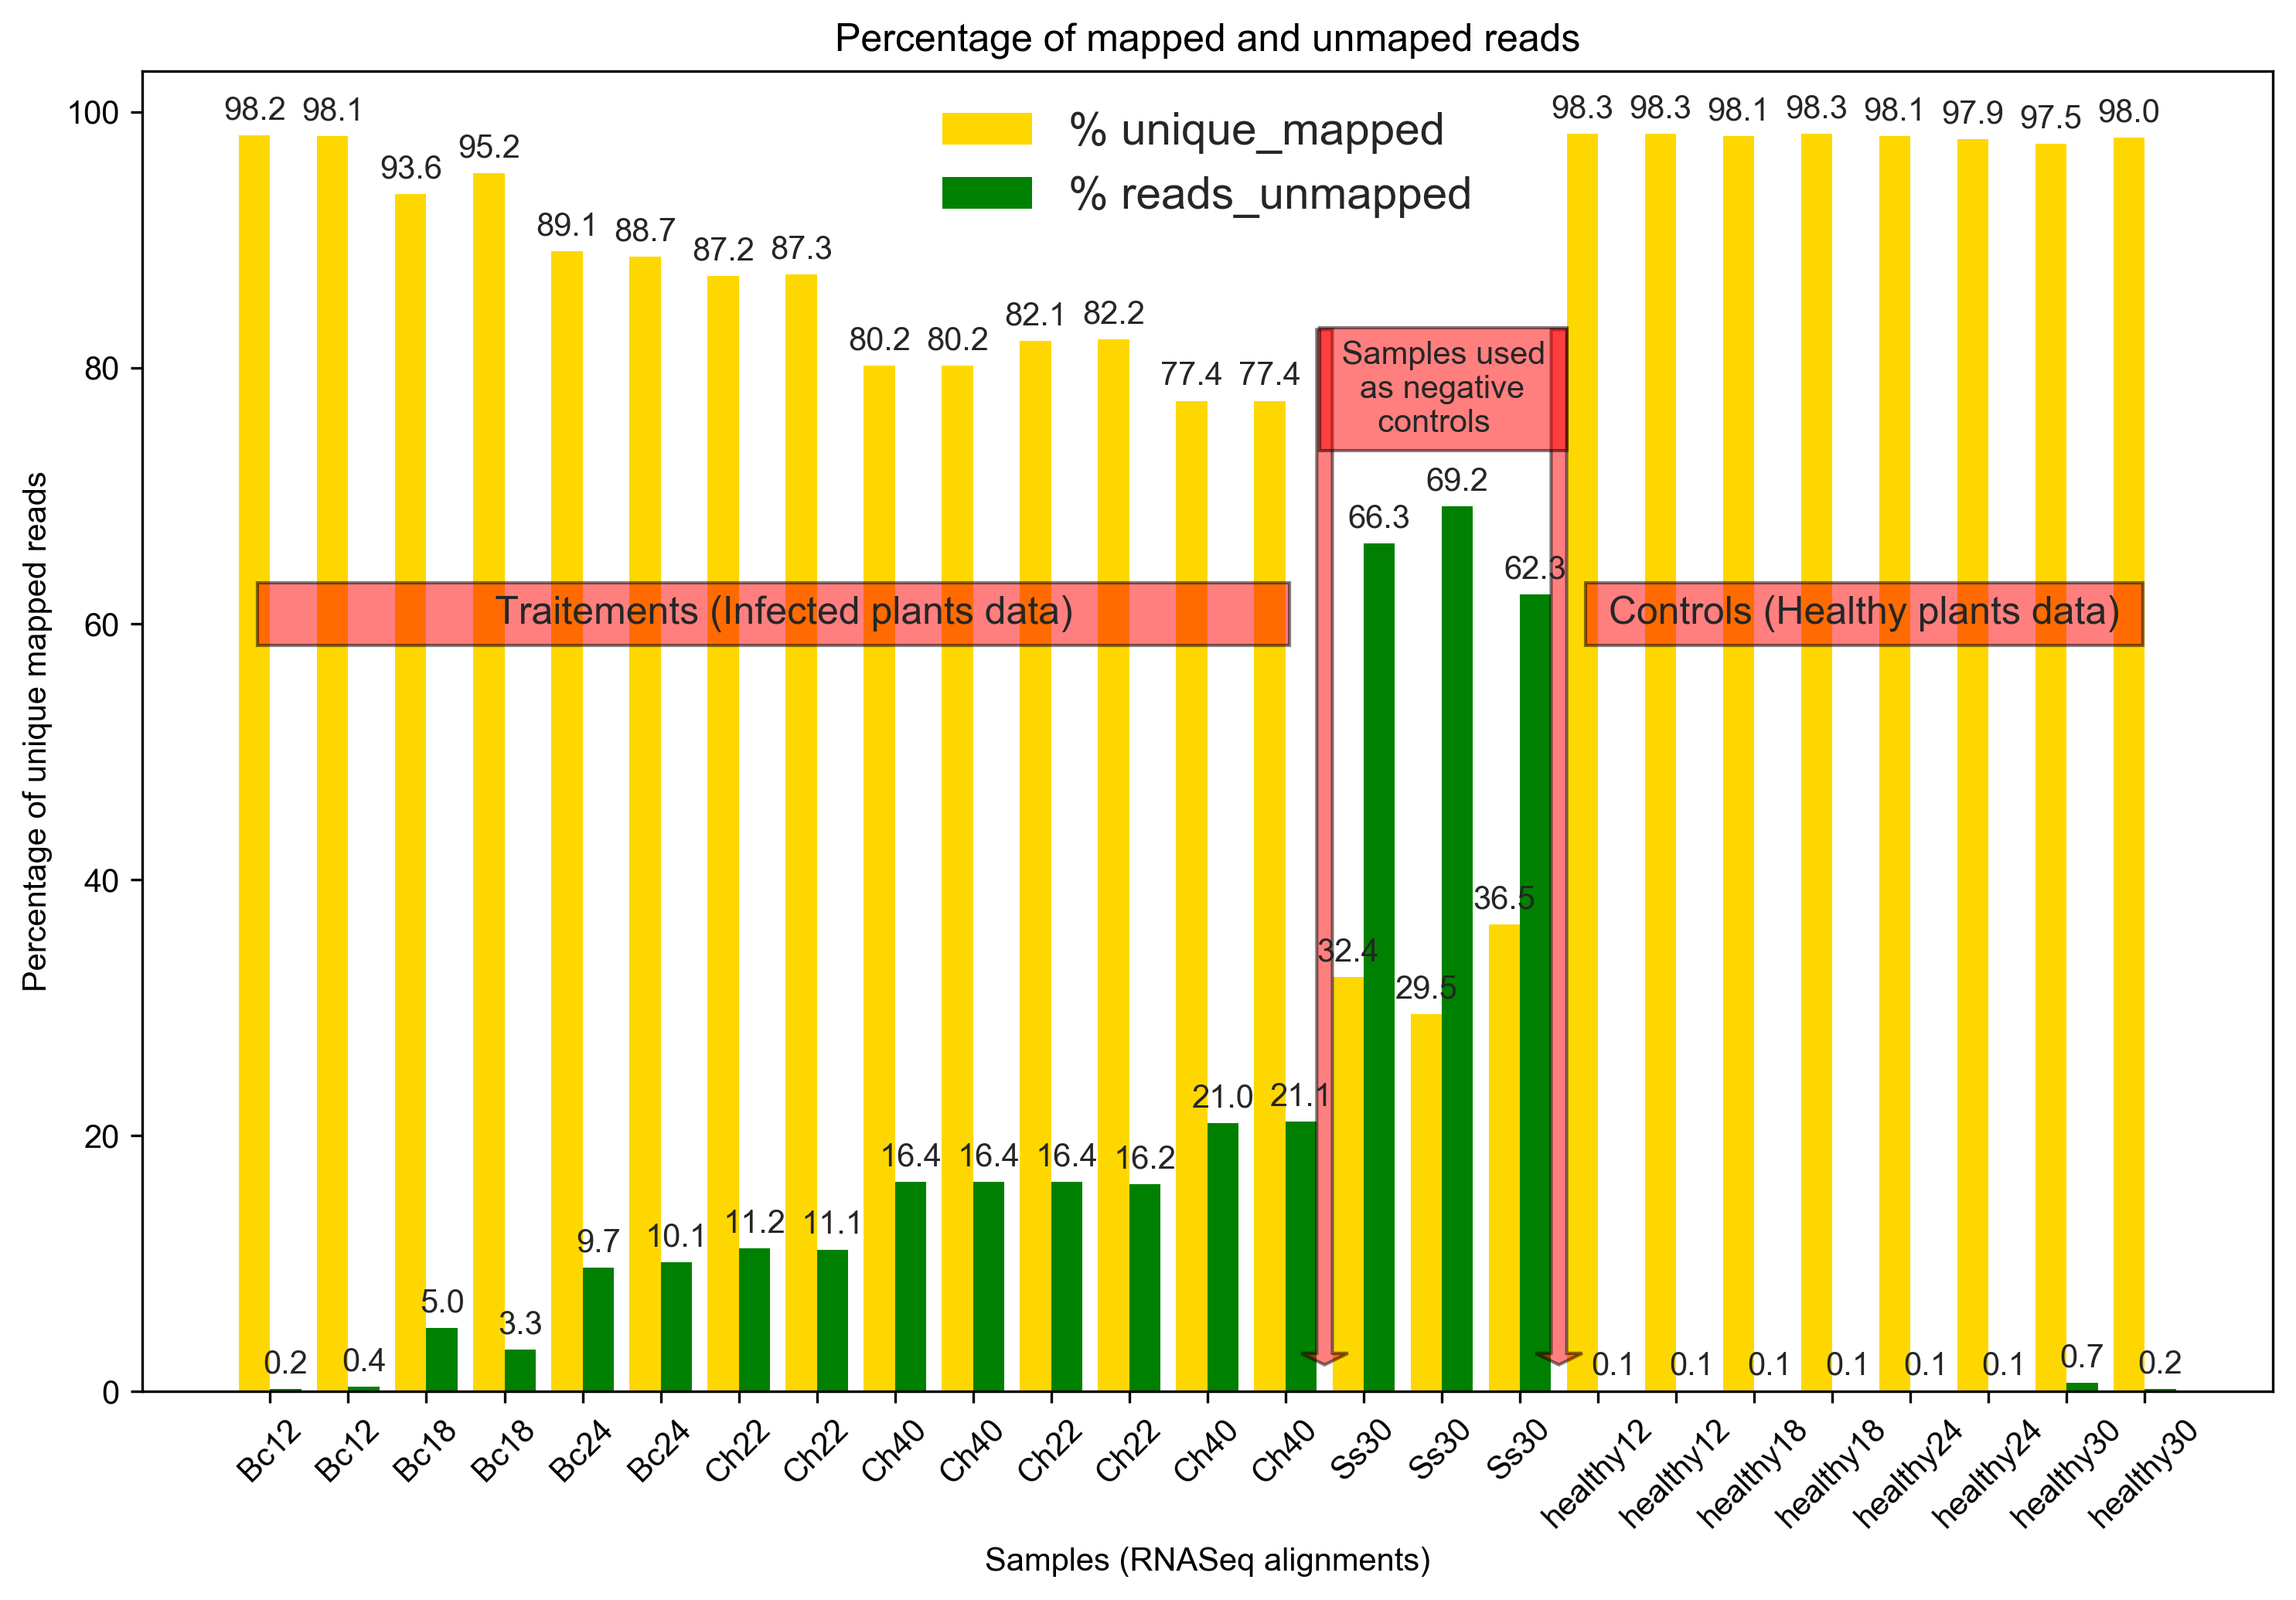

In [12]:
x = np.arange(len(sample_names))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7), dpi= 300)
plt.style.use('seaborn-white')

rects1 = ax.bar(x - width/2, f_mapped.round(1), width, label='% unique_mapped', color='gold')
rects2 = ax.bar(x + width/2, f_deletion.round(1), width, label='% reads_unmapped', color='green')
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Percentage of mapped and unmaped reads')
ax.set_ylabel('Percentage of unique mapped reads',color='black')
ax.set_xlabel('Samples (RNASeq alignments)',color='black')
ax.set_xticks(x)
ax.set_xticklabels(sample_IDs)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.legend(loc="upper center", fontsize = 14)
plt.xticks(rotation=45, color='black')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

#adding text inside the plot
plt.text(0, 60, '                     Traitements (Infected plants data)                   ', fontsize = 12,
       bbox = dict(facecolor = 'red', alpha = 0.5))
plt.text(13.6, 75, ' Samples used \n   as negative\n     controls', fontsize = 10,
       bbox = dict(facecolor = 'red', alpha = 0.5))
plt.arrow(x=13.5, y=83, dx=0, dy=-80, width=0.2, facecolor='red', alpha=0.5) 
plt.arrow(x=16.5, y=83, dx=0, dy=-80, width=0.2, facecolor='red', alpha=0.5) 
plt.text(17, 60, ' Controls (Healthy plants data) ', fontsize = 12,
       bbox = dict(facecolor = 'red', alpha = 0.5))

# str = 'Bs=Botrytis cinerea';
# ax.annotate(str, xy=(20, 70))
# str = 'Ch=Colletotrichum higginsianum';
# ax.annotate(str, xy=(20, 65))
# str = 'Ss=Sclerotinia sclerotiorum';
# ax.annotate(str, xy=(20, 60))
 
#plt.savefig("../athal2_stats/alignment2_STAR_percentages.png")

plt.show()

In [13]:
14*('gainsboro',)+3*('silver',)+8*('white',)

('gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'gainsboro',
 'silver',
 'silver',
 'silver',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white')

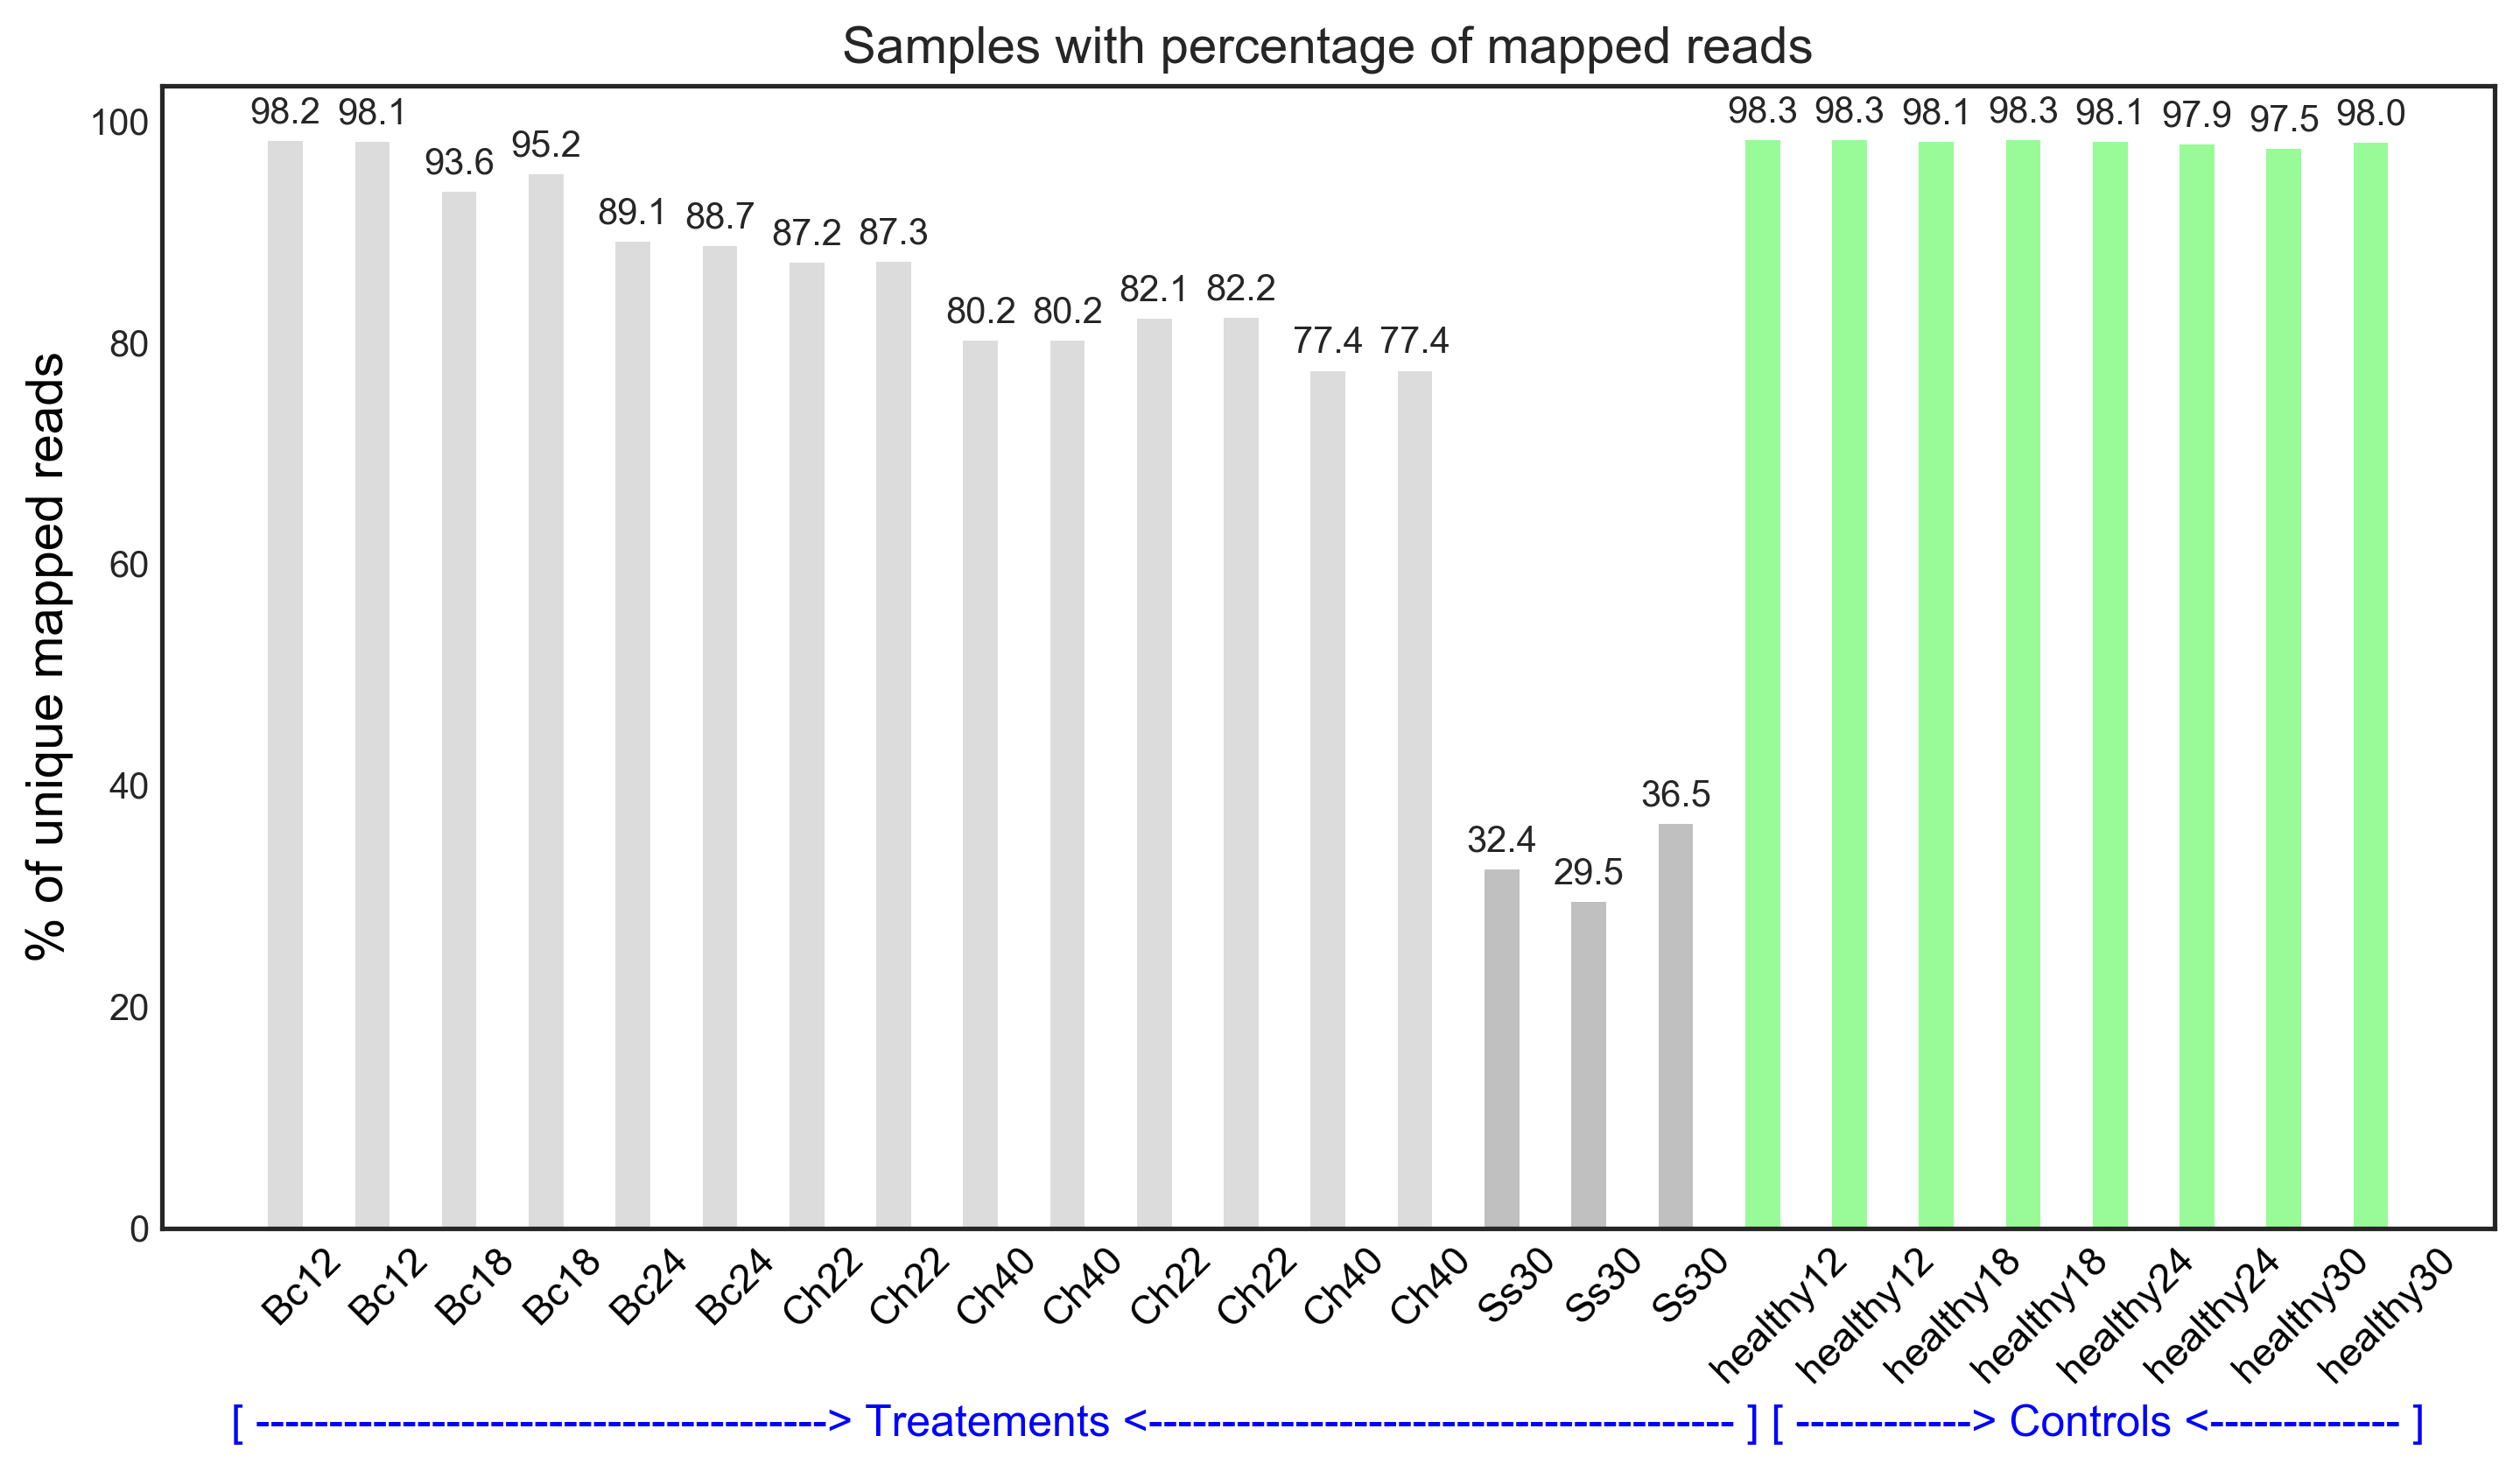

In [15]:
# from importlib import reload
# plt = reload(plt)

x = np.arange(len(sample_names))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5.7), dpi= 300)
plt.style.use('seaborn-white')

c = 14*('gainsboro',)+3*('silver',)+8*('palegreen',)

rects1 = ax.bar(x - width/2, f_mapped.round(1), width, label='% unique_mapped', color = c)
# Create bars with different colors

ax.set_title('Samples with percentage of mapped reads', fontsize=14)
ax.set_ylabel('% of unique mapped reads',color='black', fontsize=14)
ax.set_xlabel('[ ---------------------------------------> Treatements <---------------------------------------- ] [ ------------> Controls <------------- ]',
              color='blue', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(sample_IDs)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
      
ax.legend("")
#plt.legend(loc="upper center", fontsize = 14)
autolabel2(rects1)
#autolabel(rects2)
plt.xticks(rotation=45, color='black', fontsize=11)
fig.tight_layout()

# # adding text inside the plot
# plt.text(-1, 60, '\n                          Traitements (Infected plants data)                      \n', fontsize = 12,
#        bbox = dict(facecolor = 'red', alpha = 0.5))
# plt.text(13.4, 60, '\n     Negative   \n     Control', fontsize = 12,
#        bbox = dict(facecolor = 'red', alpha = 0.5))
# plt.arrow(x=13.3, y=58, dx=0, dy=-55, width=0.2, facecolor='red', alpha=0.5) 
# plt.arrow(x=16.5, y=58, dx=0, dy=-55, width=0.2, facecolor='red', alpha=0.5) 
# plt.text(17, 60, '\nPositive Control (Healthy plants data)\n', fontsize = 12,
#        bbox = dict(facecolor = 'red', alpha = 0.5))

plt.show()